In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [2]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/kaggle/input/toronto-emotional-speech-set-tess'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())

print('Dataset is Loaded')

Dataset is Loaded


In [3]:
paths[:5]

['/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_home_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_youth_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_near_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_search_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_pick_fear.wav']

In [4]:
labels[:5]

['fear', 'fear', 'fear', 'fear', 'fear']

In [5]:
## create dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/kaggle/input/toronto-emotional-speech-set-tes...,fear
1,/kaggle/input/toronto-emotional-speech-set-tes...,fear
2,/kaggle/input/toronto-emotional-speech-set-tes...,fear
3,/kaggle/input/toronto-emotional-speech-set-tes...,fear
4,/kaggle/input/toronto-emotional-speech-set-tes...,fear


In [6]:
df['label'].value_counts()

label
fear       800
angry      800
disgust    800
neutral    800
sad        800
ps         800
happy      800
Name: count, dtype: int64

## Feature Extraction

In [7]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [8]:
extract_mfcc(df['speech'][0])

array([-285.73727   ,   85.78295   ,   -2.1689112 ,   22.125532  ,
        -14.757395  ,   11.051346  ,   12.412449  ,   -3.0002618 ,
          1.0844991 ,   11.078272  ,  -17.41966   ,   -8.093213  ,
          6.5879726 ,   -4.2209535 ,   -9.15508   ,    3.52148   ,
        -13.186381  ,   14.078853  ,   19.66973   ,   22.725618  ,
         32.57464   ,   16.325035  ,   -3.8427293 ,    0.89629656,
        -11.239262  ,    6.653462  ,   -2.5883696 ,   -7.7140164 ,
        -10.941658  ,   -2.4007547 ,   -5.281288  ,    4.271157  ,
        -11.202216  ,   -9.024621  ,   -3.6669848 ,    4.869744  ,
         -1.6027985 ,    2.5600514 ,   11.454374  ,   11.233449  ],
      dtype=float32)

In [9]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [10]:
X_mfcc

0       [-285.73727, 85.78295, -2.1689112, 22.125532, ...
1       [-348.34332, 35.193233, -3.841328, 14.658875, ...
2       [-340.11435, 53.796444, -14.267782, 20.884027,...
3       [-306.63422, 21.259708, -4.4110823, 6.4871554,...
4       [-344.7548, 46.329193, -24.171413, 19.392921, ...
                              ...                        
5595    [-374.3952, 60.864998, 0.025059083, 8.431058, ...
5596    [-313.96478, 39.847843, -5.6493053, -3.867575,...
5597    [-357.54886, 77.886055, -15.224756, 2.194633, ...
5598    [-353.1474, 101.68391, -14.175896, -12.037376,...
5599    [-389.4595, 54.042767, 1.346998, -1.4258983, -...
Name: speech, Length: 5600, dtype: object

In [11]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(5600, 40)

In [12]:
## input split

X = np.expand_dims(X, -1)
X.shape

(5600, 40, 1)

In [13]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [14]:
y = y.toarray()

In [15]:
y.shape

(5600, 7)

## Create the LSTM Model

In [16]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(123, return_sequences=False, input_shape=(40, 1)),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 123)               61500     
                                                                 
 dense (Dense)               (None, 64)                7936      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 231       
                                                                 
Total params: 71747 (280.26 KB)
Trainable params: 71747 

In [55]:
import shutil

# Path dan nama file model yang ingin diunduh
model_file_path = 'model.h5'

# Path dan nama file tujuan untuk menyimpan model yang diunduh
downloaded_model_path = 'downloaded_model.h5'

# Mengkopi file model ke path tujuan
shutil.copyfile(model_file_path, downloaded_model_path)

print("Model berhasil diunduh dan disimpan sebagai", downloaded_model_path)

Model berhasil diunduh dan disimpan sebagai downloaded_model.h5


In [17]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=100, batch_size=512, shuffle=True)

Epoch 1/100
9/9 [==============================] - 6s 339ms/step - loss: 1.8538 - accuracy: 0.2953 - val_loss: 1.9340 - val_accuracy: 0.0464
Epoch 2/100
9/9 [==============================] - 2s 278ms/step - loss: 1.5280 - accuracy: 0.4960 - val_loss: 1.8554 - val_accuracy: 0.1071
Epoch 3/100
9/9 [==============================] - 2s 253ms/step - loss: 1.1142 - accuracy: 0.6321 - val_loss: 1.7496 - val_accuracy: 0.1286
Epoch 4/100
9/9 [==============================] - 2s 254ms/step - loss: 0.8794 - accuracy: 0.6826 - val_loss: 1.4464 - val_accuracy: 0.3420
Epoch 5/100
9/9 [==============================] - 2s 244ms/step - loss: 0.7304 - accuracy: 0.7417 - val_loss: 1.2413 - val_accuracy: 0.4089
Epoch 6/100
9/9 [==============================] - 2s 248ms/step - loss: 0.6146 - accuracy: 0.7830 - val_loss: 1.0822 - val_accuracy: 0.4732
Epoch 7/100
9/9 [==============================] - 2s 248ms/step - loss: 0.5044 - accuracy: 0.8176 - val_loss: 0.7441 - val_accuracy: 0.6955
Epoch 8/100
9

In [18]:
model.save('model.h5')

## Plot the Results

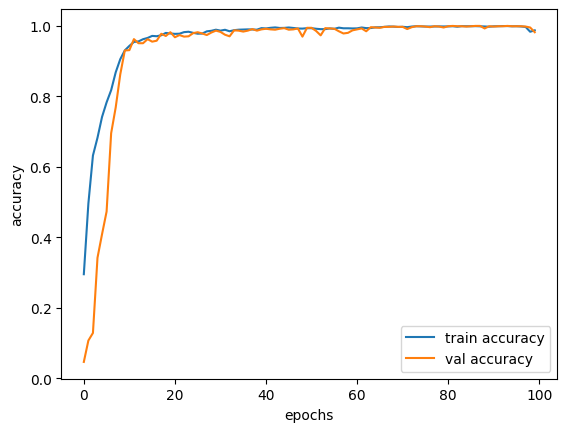

In [19]:
epochs = list(range(100))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()



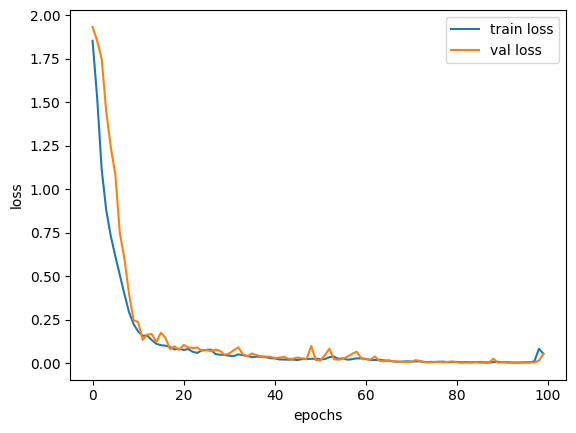

In [20]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

## Load Audio File

In [21]:
def extract_mfcc_from_audio(audio_file):
    y, sr = librosa.load(audio_file, sr=None)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [75]:
from tensorflow import keras

model = keras.models.load_model('model.h5')

# Mendapatkan fitur-fitur dari suara yang direkam
audio_features = extract_mfcc_from_audio('/kaggle/input/audio-tes/tes3.wav')

# Mengubah dimensi fitur menjadi bentuk yang diterima oleh model
audio_features = np.expand_dims(audio_features, axis=0)
audio_features = np.expand_dims(audio_features, axis=-1)

# Melakukan prediksi emosi
predictions = model.predict(audio_features)

# Mendapatkan label emosi dengan probabilitas tertinggi
predicted_emotion = enc.inverse_transform(predictions)[0]

1/1 [==============================] - 1s 548ms/step


angry: 8.498657422251199e-08
disgust: 0.9999624490737915
fear: 4.20352506580457e-07
happy: 3.4792010410455987e-06
neutral: 1.7611164366826415e-06
ps: 2.9088270821375772e-05
sad: 2.5868694137898274e-06


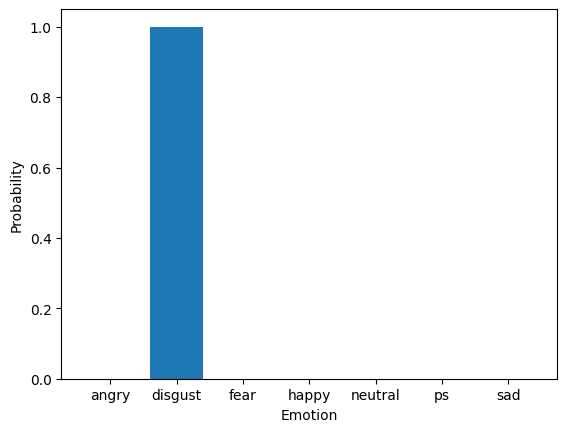

In [77]:
probabilities = predictions[0]

# Menampilkan probabilitas untuk setiap emosi
emotions = enc.categories_[0]
for emotion, probability in zip(emotions, probabilities):
    print(f'{emotion}: {probability}')

# Menampilkan plot batang probabilitas emosi
plt.bar(emotions, probabilities)
plt.xlabel('Emotion')
plt.ylabel('Probability')
plt.show()